Exploratory Data Analysis (EDA)
https://www.kaggle.com/open-source-sports/baseball-databank?select=Teams.csv

In [175]:
#import the useful libraries.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [176]:
#import the useful libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

In [177]:
#read the file
data = pd.read_csv('teams.csv')

In [178]:
#print the head of the data frame.
data.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [179]:
#print the head of the data frame.
data.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN
2804,2015,NL,COL,COL,W,5,162,81.0,68,94,...,171.0,0.985,Colorado Rockies,Coors Field,2506789.0,119,118,COL,COL,COL


In [180]:
# Checking the missing values
data.isnull().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   0
SO                 120
SB                 144
CS                 859
HBP               2325
SF                2325
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                 317
FP                   0
name                 0
park                34
attendance         279
BPF        

In [181]:
#Let's calculate the percentage of each won team wins category.
data.name.value_counts(normalize=True)

Pittsburgh Pirates         0.044563
Cincinnati Reds            0.044563
Philadelphia Phillies      0.044207
St. Louis Cardinals        0.041355
Detroit Tigers             0.040998
                             ...   
Elizabeth Resolutes        0.000357
St. Louis Red Stockings    0.000357
Washington Blue Legs       0.000357
Rockford Forest Citys      0.000357
Cleveland Infants          0.000357
Name: name, Length: 139, dtype: float64

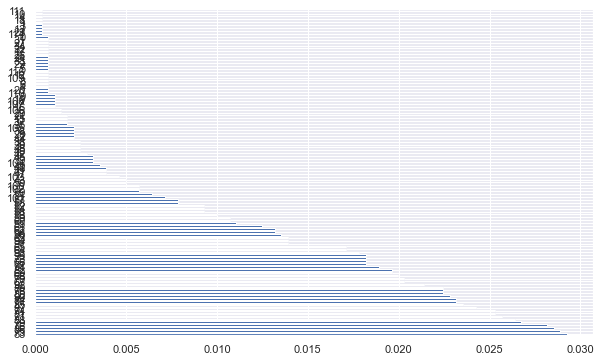

In [182]:
#plot the bar graph of percentage home team wins categories
data.W.value_counts(normalize=True).plot.barh()
plt.show()

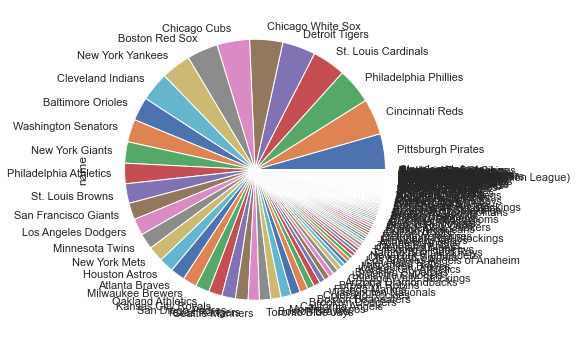

In [183]:
#plot the pie chart of education categories
data.name.value_counts(normalize=True).plot.pie()
plt.show()

In [184]:
data.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2805.000000,2805.000000,2805.00000,2406.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,...,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2488.000000,2805.000000,2.526000e+03,2805.000000,2805.000000
mean,1955.036720,4.107308,150.34795,78.465919,74.749020,74.749020,681.945811,5142.492335,1346.273440,227.624955,...,1346.083779,101.136542,474.010695,731.229234,186.337255,140.186495,0.961519,1.344346e+06,100.199643,100.225668
std,41.519083,2.323414,23.22725,4.698684,17.640402,17.378079,135.738244,750.551691,219.891603,58.692602,...,219.521064,58.245002,131.890032,296.409881,107.657444,29.322764,0.030224,9.469316e+05,4.882215,4.814985
min,1871.000000,1.000000,6.00000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,3.000000,...,49.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.760000,6.088000e+03,60.000000,60.000000
25%,1919.000000,2.000000,153.00000,77.000000,66.000000,65.000000,613.000000,5127.000000,1299.000000,193.000000,...,1288.000000,46.000000,427.000000,501.000000,116.000000,126.000000,0.960000,5.287162e+05,97.000000,97.000000
50%,1963.000000,4.000000,157.00000,81.000000,77.000000,76.000000,690.000000,5389.000000,1393.000000,231.000000,...,1392.000000,109.000000,494.000000,735.000000,145.000000,145.000000,0.970000,1.140348e+06,100.000000,100.000000
75%,1992.000000,6.000000,162.00000,81.000000,87.000000,87.000000,763.000000,5517.000000,1467.000000,270.000000,...,1470.000000,148.000000,555.000000,965.000000,217.000000,159.250000,0.980000,2.014687e+06,103.000000,103.000000
max,2015.000000,13.000000,165.00000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,...,1993.000000,241.000000,827.000000,1450.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


In [185]:
#understand data (Home Runs (HR) variable).  Note the "mean" equates to 101 per team per year.
data.HR.describe()

count    2805.000000
mean      101.136542
std        61.468300
min         0.000000
25%        42.000000
50%       107.000000
75%       149.000000
max       264.000000
Name: HR, dtype: float64

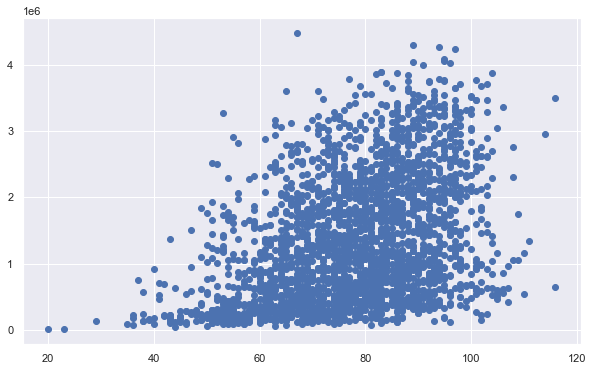

In [186]:
#plot the scatter plot of W (wins) and attendance variable in data.  Overall, the more wins the stronger the attendance.
plt.scatter(data.W,data.attendance)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


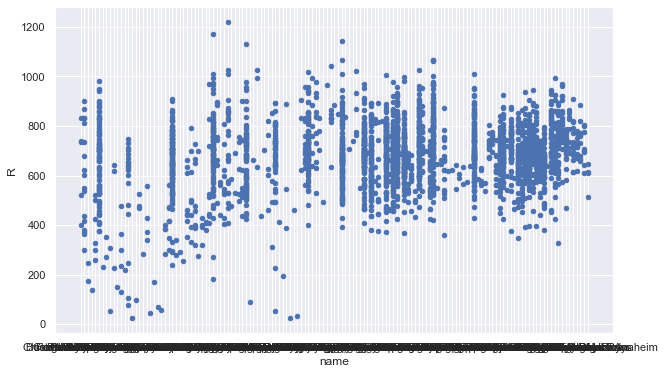

In [187]:
#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="name",y="R")
plt.show()

In [188]:
#understand data (runs)
data.R.describe()

count    2805.000000
mean      681.945811
std       135.738244
min        24.000000
25%       613.000000
50%       690.000000
75%       763.000000
max      1220.000000
Name: R, dtype: float64

In [189]:
#Calculating average attendance
data.attendance.mean()

1344345.530482977

In [190]:
df = pd.DataFrame(data, columns = ['name', 'R'])

In [191]:
print(df)

                         name    R
0        Boston Red Stockings  401
1     Chicago White Stockings  302
2      Cleveland Forest Citys  249
3        Fort Wayne Kekiongas  137
4            New York Mutuals  302
...                       ...  ...
2800      Los Angeles Dodgers  667
2801     San Francisco Giants  696
2802     Arizona Diamondbacks  720
2803         San Diego Padres  650
2804         Colorado Rockies  737

[2805 rows x 2 columns]


In [192]:
data.shape

(2805, 48)

In [193]:
data.describe

<bound method NDFrame.describe of       yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  ...     DP  \
0       1871  NaN    BS1      BNA   NaN     3   31    NaN  20  10  ...    NaN   
1       1871  NaN    CH1      CNA   NaN     2   28    NaN  19   9  ...    NaN   
2       1871  NaN    CL1      CFC   NaN     8   29    NaN  10  19  ...    NaN   
3       1871  NaN    FW1      KEK   NaN     7   19    NaN   7  12  ...    NaN   
4       1871  NaN    NY2      NNA   NaN     5   33    NaN  16  17  ...    NaN   
...      ...  ...    ...      ...   ...   ...  ...    ...  ..  ..  ...    ...   
2800    2015   NL    LAN      LAD     W     1  162   81.0  92  70  ...  133.0   
2801    2015   NL    SFN      SFG     W     2  162   81.0  84  78  ...  145.0   
2802    2015   NL    ARI      ARI     W     3  162   81.0  79  83  ...  146.0   
2803    2015   NL    SDN      SDP     W     4  162   81.0  74  88  ...  138.0   
2804    2015   NL    COL      COL     W     5  162   81.0  68  94  ...  171

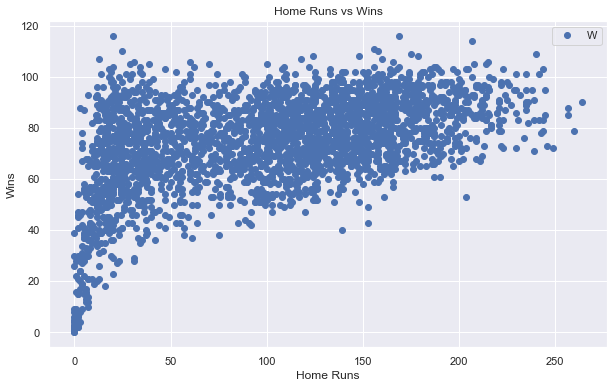

In [194]:
#let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

data.plot(x='HR', y='W', style='o')
plt.title('Home Runs vs Wins')
plt.xlabel('Home Runs')
plt.ylabel('Wins')
plt.show()

In [195]:
#To extract the attributes and labels, execute the following script

X = data.HR.values.reshape((-1, 1))
y = data.W.values

In [196]:
print(X)

[[  3]
 [ 10]
 [  7]
 ...
 [154]
 [148]
 [186]]


In [197]:
#train our algorithm. We have split our data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [198]:
#train our algorithm (importing library)

from sklearn.linear_model import LinearRegression

In [199]:
#train our algorithm by defining "regressor"

regressor = LinearRegression()

In [200]:
#train our algorithm by creating "fit"
regressor.fit(X_train, y_train)

LinearRegression()

In [201]:
print(regressor.intercept_)

60.550360958412554


In [202]:
print(regressor.coef_)

[0.13981346]


In [203]:
#make  predictions.  Use  test data and see how accurately our algorithm predicts the percentage score

y_pred = regressor.predict(X_test)

In [204]:
#To compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,84,79.564991
1,47,65.583645
2,46,60.829988
3,54,62.927190
4,54,61.389242
...,...,...
556,68,82.640887
557,75,77.747416
558,72,78.865924
559,75,63.486444


In [205]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.62785942490963
Mean Squared Error: 225.97162522900874
Root Mean Squared Error: 15.032352617904117


In [207]:
print(df)

     Actual  Predicted
0        84  79.564991
1        47  65.583645
2        46  60.829988
3        54  62.927190
4        54  61.389242
..      ...        ...
556      68  82.640887
557      75  77.747416
558      72  78.865924
559      75  63.486444
560      73  62.507749

[561 rows x 2 columns]
